# Data inspection

Below we can find the performance results of a mini benchmark [`bench-stat`](https://github.com/janhybs/bench-stat)
which were collected via `ci-hpc` framework.

The benchmark `bench-stat` was executed on a `charon` resource.

## About `bench-stat` application

`bench-stat` is application written in a `c++` language consists of 3 benchmarks performing simple memory operations in a level 1, level 2 and level 3 cache.

These operations can be extremely fast, thus the experiments are *repeated* `N` times to obtain measurable duration of the benchmarks.

$$N = 1024 * 1024 * reps$$
where $reps$ is a extra repetition coefficient which is altered in all of the commits.

As a baseline commit tagged as `reps-100` was selected, where $reps = 100$.
The total number of repetition for this commit is $N = 1024 * 1024 * 100 = 104\ 857\ 600$

A commits with maximum and minumum number of $reps$ are tagged as `reps-125` and `reps-075` respecively, meaning
theres a $\pm 25%$ performance change compared to baseline.

## Data structure 

In table below we can see a *simplified* format of the data collected. The most of the fields are self-explanitory
however some of them require explanation:

 - `tag` - a `git` tag of a commit making the results more human-readible
 - `timepoint` - numerical value of a `tag` for further purposes
 - `no` - i-th repetition

In [1]:
#%matplotlib widget
%matplotlib inline
z = 1.0#11.0/18.0
from cihpc.exp import exp_02_init as env
env = env.reload(env)
np, sc, pd, plt, sea = env.np, env.sc, env.pd, env.plt, env.sea
f_oneway = sc.stats.f_oneway
df = env.fetch_data()
print('shape', df.shape)
df.head()
df_raw = df
#df = env.sample(df_raw, 5, 'excl', 'tag')

shape (2415, 16)


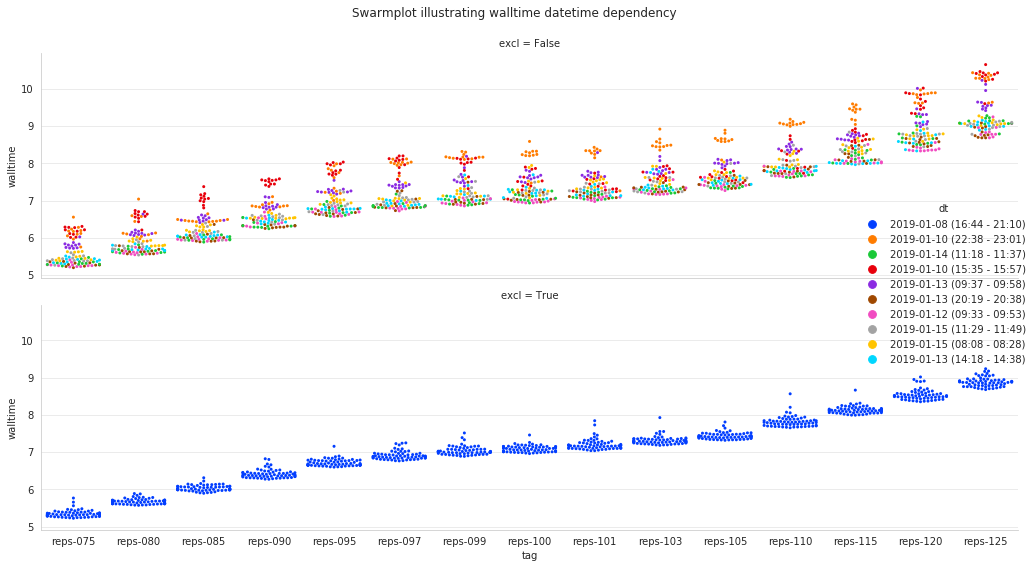

In [2]:
sea.catplot('tag', 'walltime', 'dt', data=df, row='excl', kind='swarm', height=4, aspect=3, s=3)
plt.suptitle('Swarmplot illustrating walltime datetime dependency')
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9)
env.figsave(i=1)

/storage/liberec3-tul/home/jan-hybs/.local/share/virtualenvs/ci-hpc-UesiovN7/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/storage/liberec3-tul/home/jan-hybs/.local/share/virtualenvs/ci-hpc-UesiovN7/lib/python3.6/site-packages/seaborn/axisgrid.py:720: UserWarning: Using the swarmplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/storage/liberec3-tul/home/jan-hybs/.local/share/virtualenvs/ci-hpc-UesiovN7/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


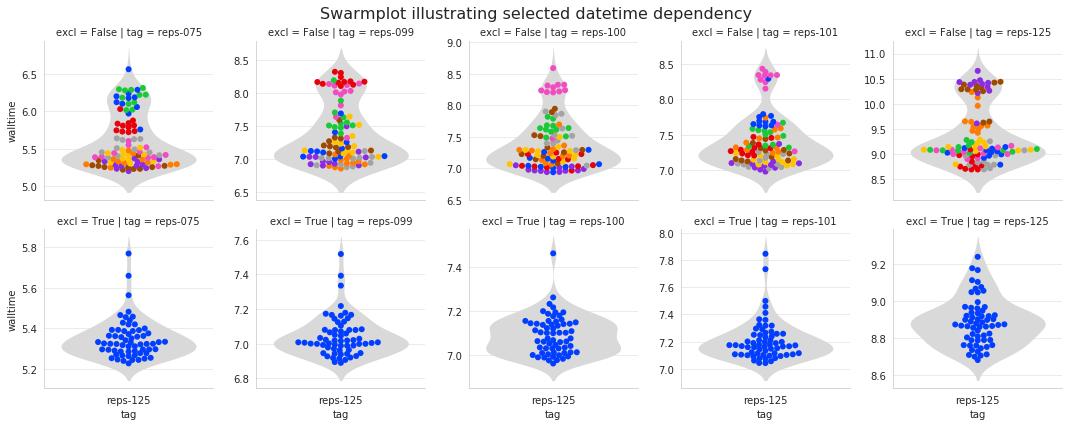

In [3]:
df_sub = df[df['tag'].isin(['reps-075', 'reps-099', 'reps-100', 'reps-101', 'reps-125'])]
g = sea.FacetGrid(df_sub, col='tag', row='excl', sharey=False)
g.map(sea.swarmplot, 'tag', 'walltime', 'dt', s=6, palette='bright')
g.map(sea.violinplot, 'tag', 'walltime', linewidth=0, color='.85')
plt.suptitle('Swarmplot illustrating selected datetime dependency', size=16)
plt.tight_layout()
plt.gcf().subplots_adjust(top=0.9)
env.figsave(i=2)

## Impact of individual commits on a duration

Chart below illustrates relation between `walltime [sec]` and commits, marked as

$$reps^{075}, reps^{080}, \dots, reps^{095}, reps^{097}, reps^{099}, reps^{100}, reps^{101}, reps^{103}, reps^{105}, reps^{110}, \dots, reps^{125}$$

count      mean       std       min       25%       50%  \
tag      excl                                                             
reps-075 False   99.0  5.599442  0.354050  5.202364  5.320633  5.442410   
         True    62.0  5.348557  0.097049  5.227812  5.287312  5.325438   
reps-080 False   99.0  5.925032  0.352491  5.541979  5.662427  5.790176   
         True    62.0  5.678179  0.073591  5.575069  5.619061  5.671772   
reps-085 False   99.0  6.275559  0.350600  5.889060  6.007382  6.156691   
         True    62.0  6.037614  0.078705  5.898752  5.984447  6.017566   
reps-090 False   99.0  6.661299  0.368134  6.248363  6.388643  6.540579   
         True    62.0  6.422799  0.117234  6.275382  6.345892  6.392579   
reps-095 False   99.0  7.055586  0.425261  6.577447  6.729464  6.897477   
         True    62.0  6.721366  0.094811  6.600902  6.650632  6.695364   
reps-097 False   99.0  7.226873  0.461674  6.726944  6.867564  7.022311   
         True    62.0  6.918086  0.114804  6.768079  6.842427  6.890303   
reps-099 False   99.0  7.376034  0.450374  6.859183  7.025501  7.184051   
         True    62.0  7.042823  0.116770  6.889166  6.972555  7.011878   
reps-100 False   99.0  7.385989  0.400424  6.938129  7.065694  7.259596   
         True    62.0  7.093686  0.088352  6.963699  7.018932  7.089084   
reps-101 False   99.0  7.411570  0.367628  6.977932  7.140783  7.287215   
         True    62.0  7.207618  0.146720  7.042105  7.108690  7.173459   
reps-103 False   99.0  7.603293  0.408091  7.166888  7.299824  7.485478   
         True    62.0  7.318743  0.113642  7.185323  7.252429  7.294799   
reps-105 False   99.0  7.712692  0.386711  7.273009  7.438924  7.604383   
         True    62.0  7.440791  0.092816  7.320915  7.381739  7.420982   
reps-110 False   99.0  8.086207  0.438178  7.621582  7.778672  7.907498   
         True    62.0  7.823826  0.146040  7.657138  7.727313  7.804145   
reps-115 False   99.0  8.464070  0.426631  7.968562  8.095832  8.373870   
         True    62.0  8.137335  0.103731  7.995107  8.069129  8.125219   
reps-120 False   99.0  8.955644  0.506202  8.335785  8.564836  8.785268   
         True    62.0  8.545331  0.146651  8.355808  8.454462  8.513479   
reps-125 False   99.0  9.357883  0.571189  8.687830  8.989295  9.102668   
         True    62.0  8.887986  0.126913  8.681858  8.790484  8.874908   

                     75%        max  
tag      excl                        
reps-075 False  5.822396   6.558766  
         True   5.387577   5.770359  
reps-080 False  6.099945   7.043992  
         True   5.714966   5.890615  
reps-085 False  6.461107   7.377536  
         True   6.080361   6.314405  
reps-090 False  6.839929   7.587250  
         True   6.465295   6.824703  
reps-095 False  7.250382   8.036691  
         True   6.775897   7.159690  
reps-097 False  7.433047   8.202521  
         True   6.960714   7.251064  
reps-099 False  7.642003   8.321705  
         True   7.079613   7.517297  
reps-100 False  7.598292   8.591420  
         True   7.145386   7.462409  
reps-101 False  7.577893   8.432895  
         True   7.256042   7.846398  
reps-103 False  7.767923   8.922563  
         True   7.358529   7.929847  
reps-105 False  7.820931   8.892609  
         True   7.482217   7.811440  
reps-110 False  8.329826   9.187071  
         True   7.877952   8.568630  
reps-115 False  8.669874   9.598881  
         True   8.172845   8.667684  
reps-120 False  9.323034  10.022719  
         True   8.582911   9.020817  
reps-125 False  9.630268  10.654035  
         True   8.946518   9.240972

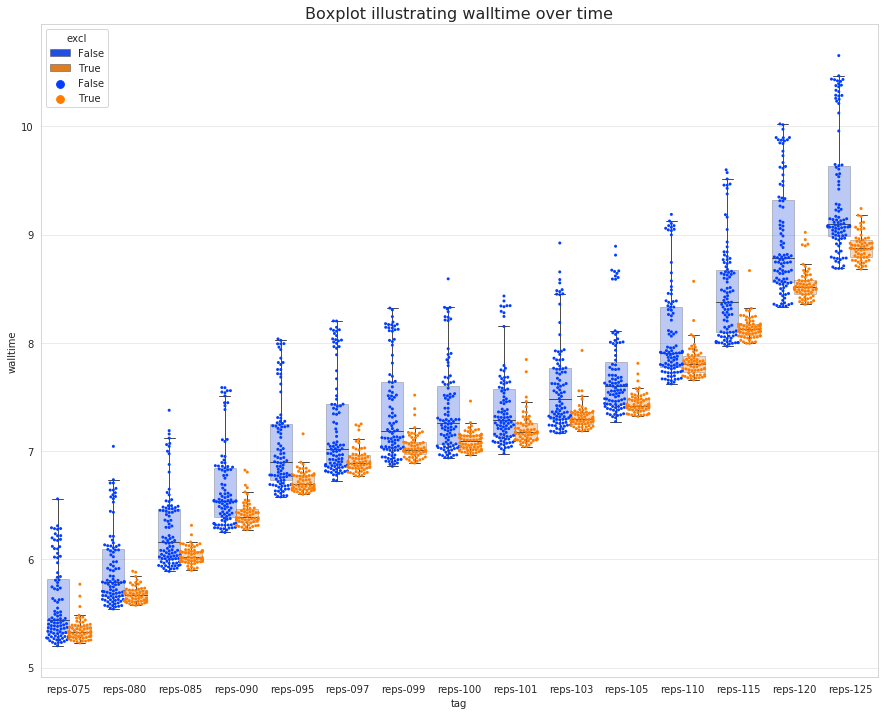

In [4]:
plt.figure(figsize=(15*z, 12))
ex_kws = dict(showfliers=False, boxprops=env.alpha_style(0.3, '-'), meanline=True)
sea.boxplot('tag', 'walltime', 'excl', data=df, linewidth=1.0, dodge=True, **ex_kws)
sea.swarmplot('tag', 'walltime', 'excl', data=df, size=3, dodge=True)
plt.title('Boxplot illustrating walltime over time', size=16);
env.figsave(i=3)
df.groupby(by=['tag', 'excl'])['walltime'].describe()

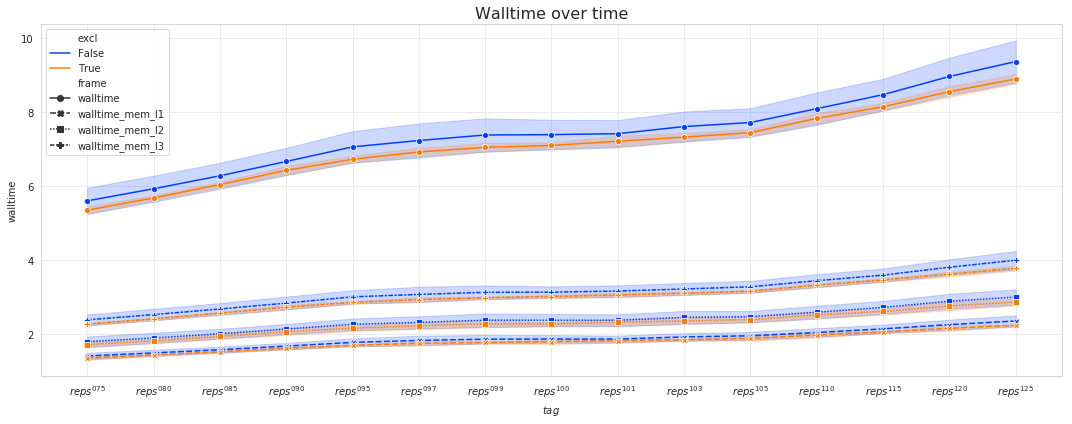

In [5]:
walls = ['walltime', 'walltime_mem_l1', 'walltime_mem_l2', 'walltime_mem_l3']
df2 = env.unwrap(df, walls, 'frame',  'walltime', ['tag', '$tag$', 'excl', 'hpc'])
plt.figure(figsize=(15*z, 6))
sea.lineplot(data=df2, x='$tag$', y='walltime', style='frame', hue='excl', markers=True, ci='sd')
plt.title('Walltime over time', size=16);
plt.tight_layout()
env.figsave(i=4)

## Data distribution for individual commits

Charts below show histogram for each of the 15 commits along with `normal` fit (gray dashed line)

Subplot title consists of 3 lines:

 1. `git tag` value, e.g. $reps^{075}$
 2. `bench-stat` running **exclusively** (no other job present on chosen vnode) using vnode `charon20.nti.tul.cz` in **orange** color
 2. `bench-stat` running in **a normal mode** (vnode shared among other jobs) using vnodes `charon*.nti.tul.cz` in **blue** color


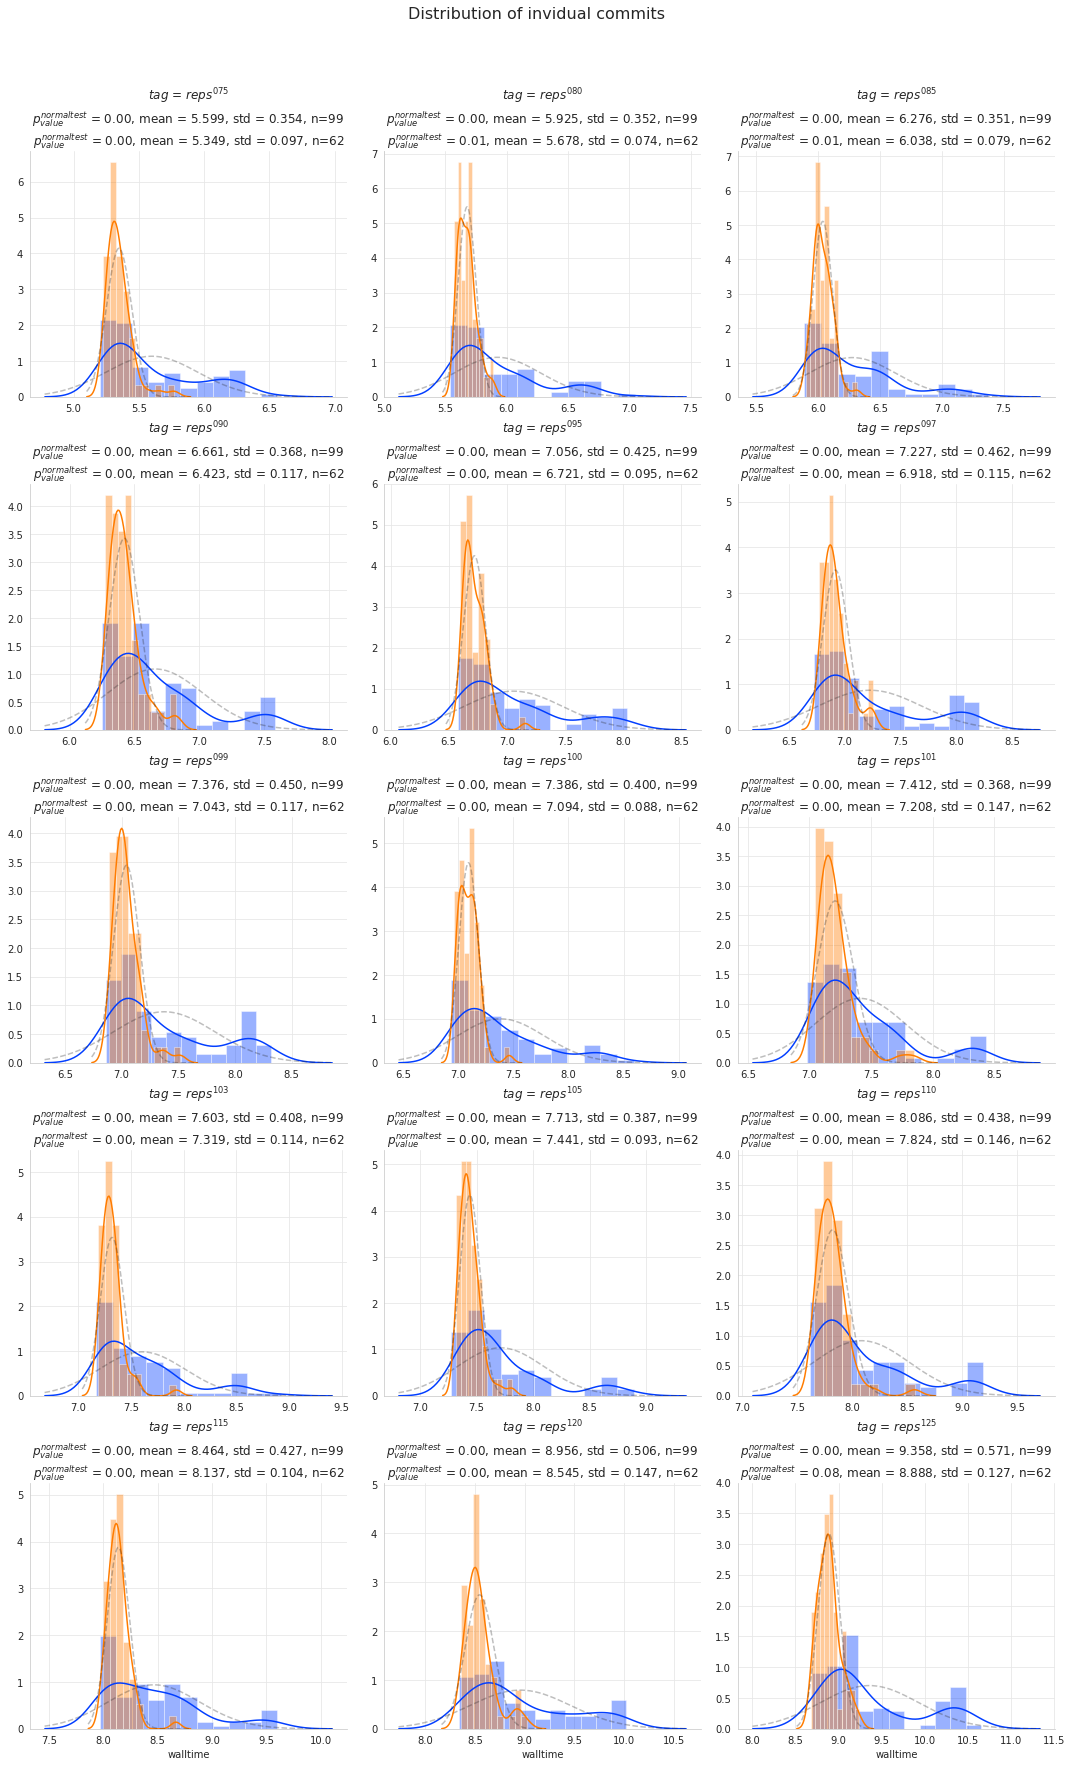

In [6]:
def add_to_title(*series):
    ax = plt.gca()
    title = ax.get_title()
    
    for walltime, in series:
        try:
            p_value = sc.stats.normaltest(walltime)[1]
        except:
            p_value = 0.0
        stats = walltime.describe()
        title += ('\n$p^{normaltest}_{value}$ = %1.2f, '
                  'mean = %1.3f, std = %1.3f, n=%d') % (p_value, stats['mean'], stats['std'], stats['count'])
    ax.set_title(title)
    
#df['np.log(walltime)'] = np.log10(df['walltime'])
kws = dict(bins=11, kde=True, rug=False, fit=sc.stats.norm)
g = sea.FacetGrid(df, col='$tag$', col_wrap=3, aspect=1.0*z, height=5, sharex=False, sharey=False, hue='excl')
g.map(sea.distplot, 'walltime', fit_kws=env.alpha_style(0.3, '--'), **kws);
g.fig.suptitle("Distribution of invidual commits", size=16)
env.map_facetgrid(g, add_to_title, 'walltime')
plt.tight_layout()
g.fig.subplots_adjust(top=0.9)
env.figsave(i=5)

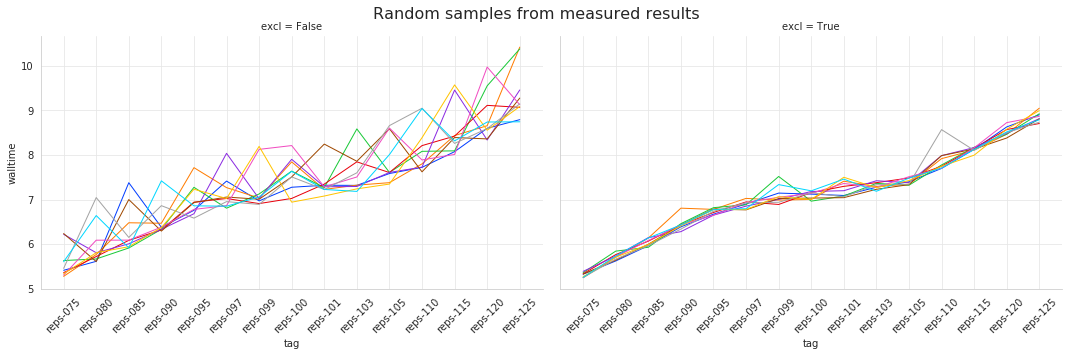

In [7]:
df2 = pd.DataFrame()
for i in range(10):
    d = env.sample(df, 1, 'excl', 'tag')
    d['sample'] = i
    df2 = df2.append(d)
    
def lineplot(tag, walltime, **kwargs):
    sea.lineplot(tag, walltime, **kwargs)

g = sea.FacetGrid(df2, col='excl', hue='sample', height=5, aspect=1.5)
g.map(lineplot, 'tag', 'walltime', lw=1)
plt.suptitle('Random samples from measured results', size=16)
g.set_xticklabels(rotation=45)
plt.tight_layout()
g.fig.subplots_adjust(top=0.9)
env.figsave(i=6)

# 1-way ANOVA test

The one-way ANOVA tests the null hypothesis that **two or more groups have
the same population mean**. The test is applied to samples from two or more groups,
possibly with differing sizes. The ANOVA test has important assumptions that must be satisfied
in order for the associated p-value to be valid:

  1. The samples are independent.
  2. Each sample is from a normally distributed population.
  3. The population standard deviations of the groups are all equal.
     This property is known as homoscedasticity

In this experiment we will try to find a number of repetition which is necessary for ANOVA to reject null hypothesis 
and accept alternative hypothesis that two groups have different population mean.

In [8]:
excl = df[df['excl'] == True]
nonexcl = df[df['excl'] == False]
sample_sizes = [2, 3, 4, 5, 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 99]

experiments = [
    # title                    group A     group B     data from exclusive HPC
    ('same performance',       'reps-100', 'reps-100', True),
    (' 1% performance change', 'reps-099', 'reps-100', True),
    (' 3% performance change', 'reps-097', 'reps-100', True),
    (' 5% performance change', 'reps-095', 'reps-100', True),
    ('10% performance change', 'reps-090', 'reps-100', True),
    
    ('same performance',       'reps-100', 'reps-100', False),
    (' 1% performance change', 'reps-099', 'reps-100', False),
    (' 3% performance change', 'reps-097', 'reps-100', False),
    (' 5% performance change', 'reps-095', 'reps-100', False),
    ('10% performance change', 'reps-090', 'reps-100', False),
]

def do_exp(reps, sample_sizes, experiments, **kwargs):
    result = list()
    for experiment, g1_name, g2_name, isexcl in experiments:
        g = excl if isexcl else nonexcl
        g1 = g[g['tag'] == g1_name]['walltime']
        g2 = g[g['tag'] == g2_name]['walltime']

        for sample_size in sample_sizes:
            for more_samples in range(reps):
                if sample_size > len(g1):
                    continue
                    
                a = env.sample(g1, sample_size)
                b = env.sample(g2, sample_size)
                anova_ab = f_oneway(a, b)
                result.append(dict(
                    experiment=experiment,
                    mean_a=a.mean(),
                    mean_b=b.mean(),
                    excl=isexcl,
                    sample_size='%2d' % sample_size,
                    p_value=anova_ab[1]
                ))

    df_anova = pd.DataFrame(result)

    g = sea.FacetGrid(df_anova, row='excl', hue='experiment', row_order=[True, False], height=6, aspect=2.2, **kwargs)
    g.map(sea.lineplot, 'sample_size', 'p_value', ci=90)

    for row_axs in g.axes:
        for ax in row_axs:
            #ax.axhline(0.05, ls=':', c='k', label='5% reject threshold')
            ax.axhspan(0, 0.05, color='k', alpha=0.2, label='95% chance, the performance has changed')
            ax.legend()


    plt.suptitle('Estimating number of repetition using ANOVA test')
    plt.tight_layout()
    g.fig.subplots_adjust(top=0.9)
    env.figsave(i=7)
    return df_anova

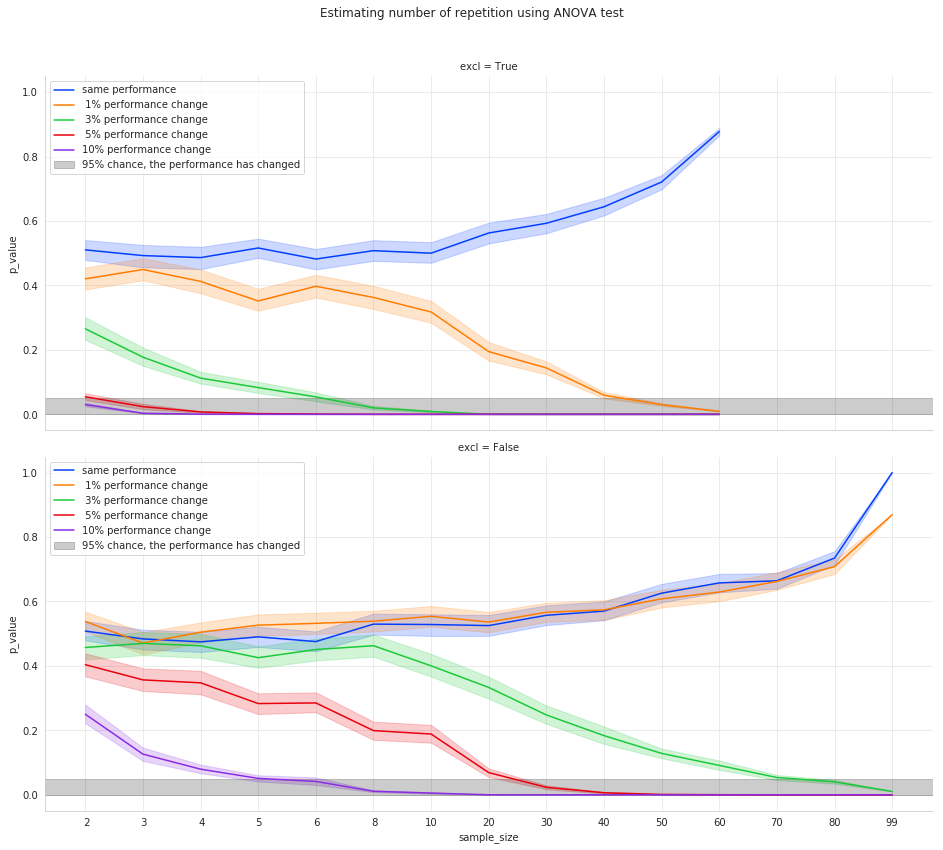

In [9]:
df_anova = do_exp(200, sample_sizes, experiments)

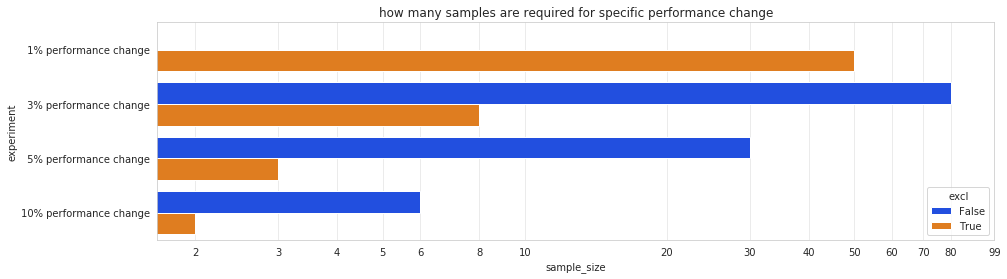

In [10]:
result = dict()
variables = ['excl', 'experiment', 'sample_size']
for g, d in df_anova.groupby(by=variables):
    p_value = d['p_value']
    if p_value.mean() < 0.05:
        if ((g[0], g[1]) not in result) or int(g[2]) < result[(g[0], g[1])]['sample_size']:
            r = dict(zip(variables, g))
            r['mean'] = p_value.mean()
            r['sample_size'] = int(g[2])
            result[(g[0], g[1])] = r

df_result = pd.DataFrame(result).T.reset_index(drop=True)
df_result = df_result.sort_values(by=['experiment', 'excl', 'sample_size'], ascending=True)
plt.figure(figsize=(15*z, 4))
sea.barplot('sample_size', 'experiment', hue='excl', data=df_result, orient='h')
plt.xscale('log')
plt.xticks(sample_sizes, sample_sizes);
plt.title('how many samples are required for specific performance change')
env.figsave(i=8)

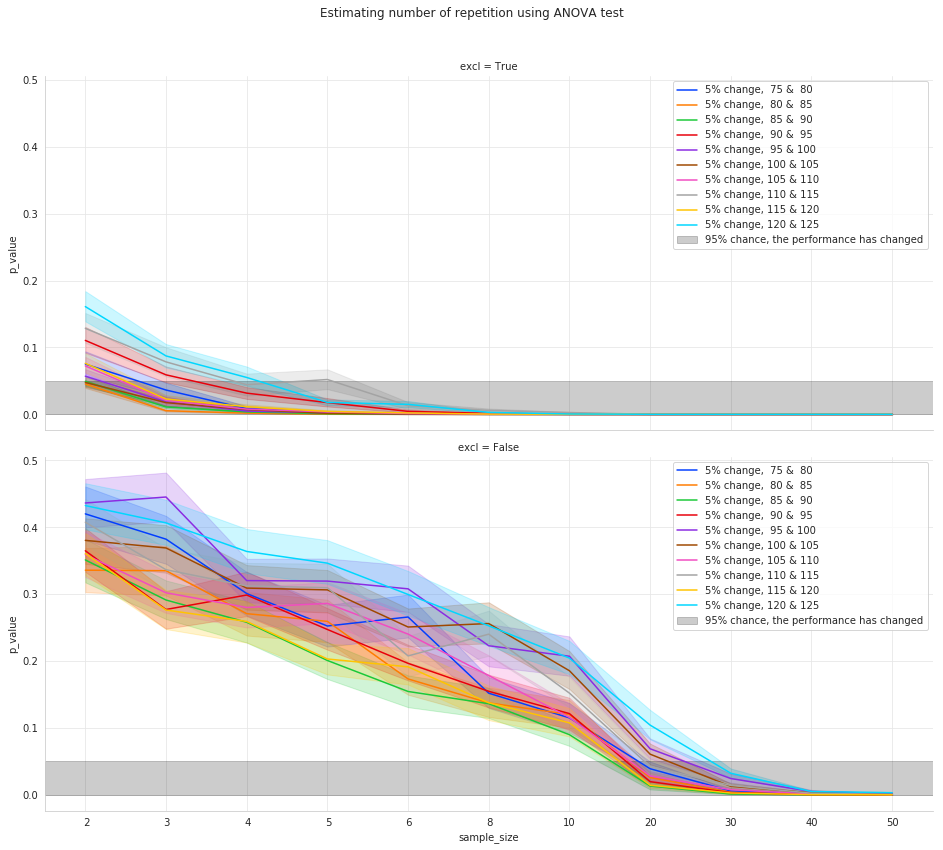

In [46]:
sample_sizes2 = [2, 3, 4, 5, 6, 8, 10, 20, 30, 40, 50]
experiments2 = list()
for i in range(75, 125, 5):
    for tf in [True, False]:
        experiments2.append(
            # title                              group A           group B             exclusive
            ('5%% change, %3d & %3d' % (i, i+5), 'reps-%03d' % i, 'reps-%03d' % (i+5), tf)
        )

df_anova5 = do_exp(200, sample_sizes2, experiments2);

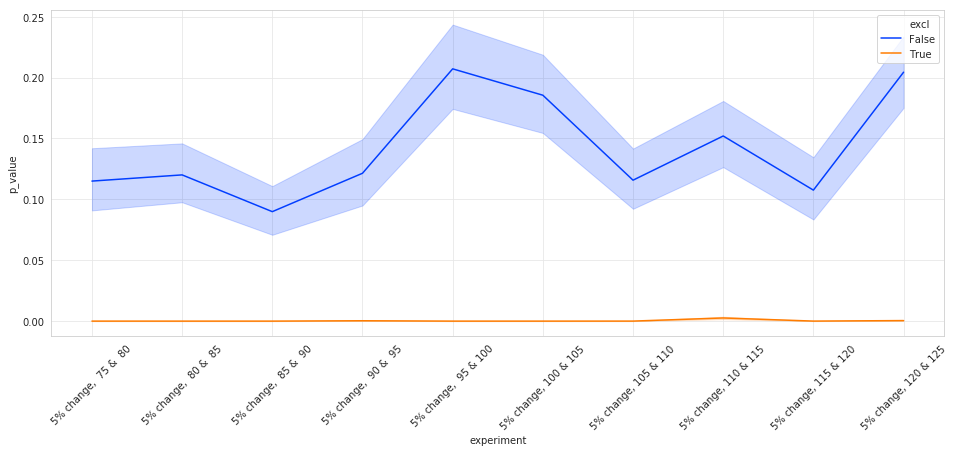

In [53]:
df_anova5.sample_size = df_anova5.sample_size.apply(int)
plt.figure(figsize=(16*z, 6))
sea.lineplot('experiment', 'p_value',  'excl', data=df_anova5[df_anova5.sample_size == 10])
plt.legend()
plt.xticks(rotation=45);
#g = sea.FacetGrid(df_anova5[df_anova5.sample_size == 10], hue='experiment', col='excl', height=5, aspect=1.6, sharey=False)
#g.map(plt.scatter, 'mean_a', 'p_value')

# Discussion/findings

A variable $S_n$ designates a number of samples picked randomly from measured date for each group,
a variable $P$ is a $P$ value obtained from the *1-way ANOVA test* testing the $H_0$ that two groups have the same population mean.

The charts above illustrates how many samples are needed in order to detect performance change in a observed software package.
The charts illustrate results from exclusive and non-exclusive group, respectively.

From the upper chart, we can see that with $S_n=3$ we can detect performance change greater or equal to 5% with 95% certainty
(meaning there is 19/20 probability of finding an effect at least as extreme as the one in a sample data).
In order to detect smaller performance changes, value $S_n$ is increasing exponentially. For 3% performance change, $S_n=10$ is required and for 1% performance change total of $S_n=50$ is needed.

A seconds chart illustrates results of the same test but performed using shared (non exclusive) HPC resource instead of exclusive one.
As in a previous test, we are trying to find $S_n$, which allows us to detect 5% performance change.
This time however the value of $S_n$ is 10 times greater than previously, sample size of $S_n=30$ is needed.

*Note* this particlar $S_n$ value are depended on a benchmark application which is tested. Other benchmarks, where walltime is different
or a nature of the benchmark is different may have different value.

In [13]:
def do_exp2(reps=100):
    result = list()
    for experiment, g1_name, g2_name, use_log in experiments:
        g = excl
        pp_func = np.log if use_log else lambda x: x
        g1 = g[g['tag'] == g1_name]['walltime']
        g2 = g[g['tag'] == g2_name]['walltime']

        for sample_size in sample_sizes:
            for more_samples in range(reps):
                if sample_size > len(g1):
                    continue
                    
                a = pp_func(env.sample(g1, sample_size))
                b = pp_func(env.sample(g2, sample_size))
                anova_ab = f_oneway(a, b)
                result.append(dict(
                    experiment=experiment,
                    func='np.log' if use_log else '<none>',
                    sample_size='%2d' % sample_size,
                    p_value=anova_ab[1]
                ))

    df_anova = pd.DataFrame(result)

    plt.figure(figsize=(17*z, 6))
    #plt.gca().axhline(0.05, ls=':', c='k', label='5% reject threshold')
    plt.gca().axhspan(0, 0.05, color='k', alpha=0.2, label='95% chance, the performance has changed')
    sea.lineplot('sample_size', 'p_value', data=df_anova, ci=90, hue='experiment', style='func')
    plt.title('Comparing ANOVA experiment where in one case log was applied to the data')
    env.figsave(i=9)
    return df_anova

#do_exp(100)